<a href="https://colab.research.google.com/github/Sanjana1125/IIITH-AIML-Course-/blob/main/Project_Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJECT - MODULE 2

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP # Uncomment if you plan to use UMAP

# For better progress bars with some operations
from tqdm.autonotebook import tqdm

In [24]:
try:
  data = pd.read_csv('BankChurners.csv')
  print("Data read successfully")
except:
  print("Data not found")


Data read successfully


In [25]:
print("\nDataset Head:")
data.head()


Dataset Head:


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [26]:
data.drop(columns = [ 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace = False, errors='ignore')

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
...               ...  ...                     ...                    ...   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124  

In [27]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [28]:
df = data.drop('CLIENTNUM', axis = 1)
df = pd.get_dummies(df, columns = ['Attrition_Flag', 'Gender', 'Marital_Status', 'Card_Category'], drop_first = True)

edu_order = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
df['Education_Level'] = OrdinalEncoder(categories = [edu_order]).fit_transform(df[['Education_Level']])

income_order = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
df['Income_Category'] = OrdinalEncoder(categories = [income_order]).fit_transform(df[['Income_Category']])
df.head()

numerical_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
encoded_cols = [col for col in df.columns if col not in numerical_cols]
df[numerical_cols] = StandardScaler().fit_transform(df[numerical_cols])
customer_labels = data['Attrition_Flag']
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 26 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Customer_Age                                                                                                                        10127 non-null  float64
 1   Dependent_count                                                                                                                     10127 non-null  float64
 2   Education_Level                                                                                                                     10127 non-null  float64
 3   Income_Category                                                                  

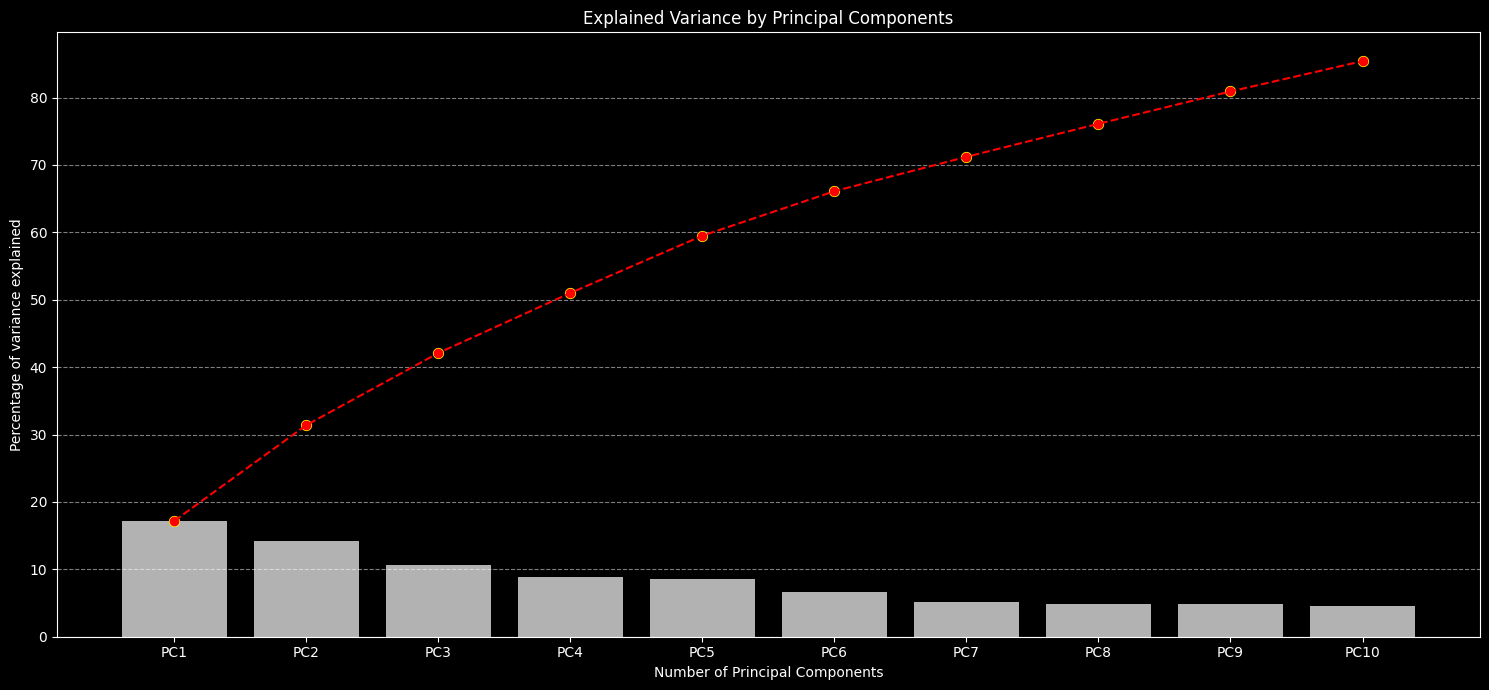

In [29]:
# Performing PCA on the numerical and one-hot encoded features
pca = PCA()
pca.fit(df)
pca_data = pca.transform(df)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
cumulative_var = np.cumsum(per_var)
labels = [f'PC{i+1}' for i in range(len(per_var))]

# Limiting to first 3 to visualize
per_var_display = per_var[:10]
labels_display = labels[:10]
cumulative_variance_display = cumulative_var[:10]

# plot
with plt.style.context('dark_background'):
    plt.figure(figsize=(15, 7))
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Percentage of variance explained")
    plt.bar(range(1, len(per_var_display) + 1), per_var_display, tick_label=labels_display, color="white", alpha=0.7)
    plt.plot(range(1, len(per_var_display) + 1), cumulative_variance_display, color="red", marker='o', linestyle='--')
    plt.scatter(range(1, len(per_var_display) + 1), cumulative_variance_display, color="yellow", s=50)
    plt.title("Explained Variance by Principal Components")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

Performing T - SNE


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



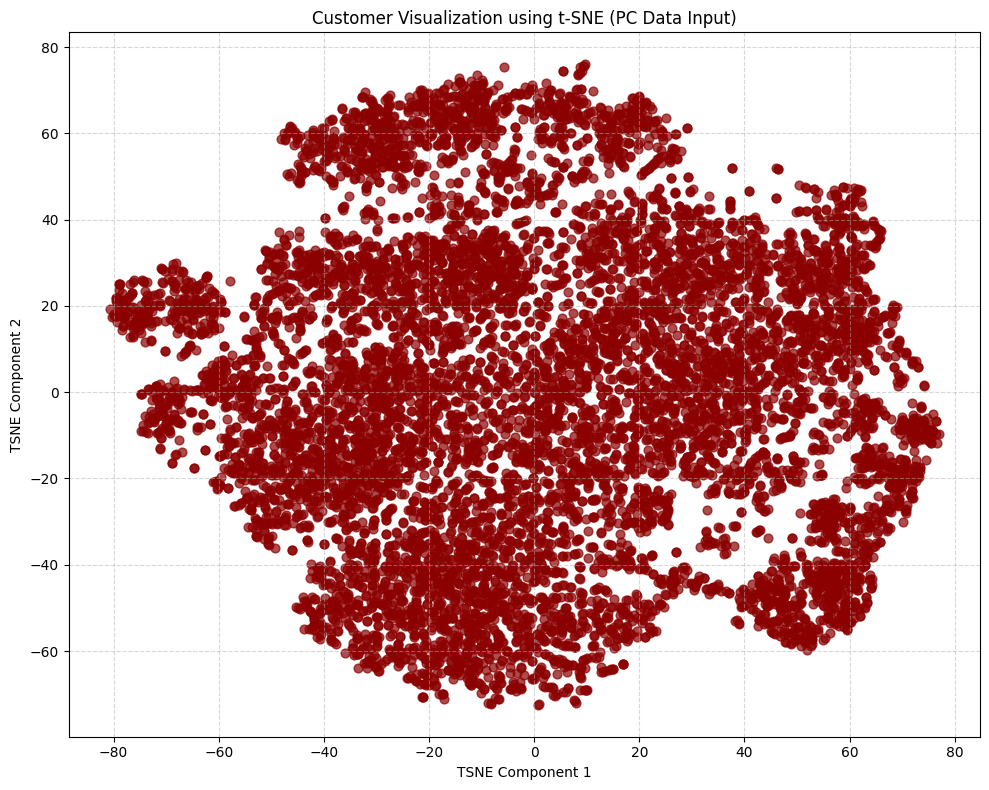

In [30]:
random_state = 42
n_components = 2
perplexity = 30
n_iter = 1000

model_tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter, random_state=random_state)
tsne_data = model_tsne.fit_transform(df)

tsne_df = pd.DataFrame(data = tsne_data, columns = ['TSNE_Component_1', 'TSNE_Component_2'])
plt.figure(figsize=(10, 8))

plt.scatter(tsne_df['TSNE_Component_1'], tsne_df['TSNE_Component_2'], alpha=0.7, s=40, color='darkred')
plt.title('Customer Visualization using t-SNE (PC Data Input)')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("tsne_2d_scatter_plot.png")
plt.show()

## Storing Labels for Visualization
Before we visualize, let's store the original categorical labels for coloring our plots.

In [31]:
# Store original labels BEFORE preprocessing for visualization
# Re-read data to get original labels
data_original = pd.read_csv('BankChurners.csv')

# Store labels for coloring
attrition_labels = data_original['Attrition_Flag']
gender_labels = data_original['Gender']
education_labels = data_original['Education_Level']
income_labels = data_original['Income_Category']
card_labels = data_original['Card_Category']
marital_labels = data_original['Marital_Status']

print("Labels stored for visualization!")
print(f"\nAttrition Distribution:")
print(attrition_labels.value_counts())

Labels stored for visualization!

Attrition Distribution:
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


## PCA Visualizations
Now let's create interactive scatter plots of PCA results with different colorings.

In [32]:
# Add labels to PCA DataFrame
pca_df = pd.DataFrame(data=pca_data[:, 0:2], columns=['PC1', 'PC2'])
pca_df['Attrition_Flag'] = attrition_labels.values
pca_df['Gender'] = gender_labels.values
pca_df['Education_Level'] = education_labels.values
pca_df['Income_Category'] = income_labels.values
pca_df['Card_Category'] = card_labels.values

print("PCA DataFrame with labels:")
pca_df.head()

PCA DataFrame with labels:


PC1       PC2     Attrition_Flag Gender Education_Level  \
0  1.233746 -0.648956  Existing Customer      M     High School   
1 -0.923399  1.082828  Existing Customer      F        Graduate   
2  0.975317  1.200347  Existing Customer      M        Graduate   
3 -2.248056 -0.873216  Existing Customer      F     High School   
4  0.479774 -1.813429  Existing Customer      M      Uneducated   

  Income_Category Card_Category  
0     $60K - $80K          Blue  
1  Less than $40K          Blue  
2    $80K - $120K          Blue  
3  Less than $40K          Blue  
4     $60K - $80K          Blue

In [20]:
# PCA Plot - Colored by Attrition Flag (MOST IMPORTANT)
fig = px.scatter(pca_df, x='PC1', y='PC2', color='Attrition_Flag',
                 title='Bank Customers: PCA Visualization (Colored by Attrition Status)',
                 labels={'PC1': f'Principal Component 1 ({per_var[0]:.1f}%)',
                          'PC2': f'Principal Component 2 ({per_var[1]:.1f}%)'},
                 hover_data=['Gender', 'Education_Level', 'Income_Category'], height=600, width=900,
                 color_discrete_map={'Existing Customer': 'green', 'Attrited Customer': 'red'})
fig.update_layout(plot_bgcolor='rgba(240,240,240,1)', font_color='black')
fig.show()

In [21]:
# PCA Plot - Colored by Income Category
fig = px.scatter(pca_df, x='PC1', y='PC2', color='Income_Category',
                 title='Bank Customers: PCA Visualization (Colored by Income Category)',
                 labels={'PC1': f'Principal Component 1 ({per_var[0]:.1f}%)',
                 'PC2': f'Principal Component 2 ({per_var[1]:.1f}%)'},
                 hover_data=['Attrition_Flag', 'Education_Level'], height=600, width=900,
                 color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(plot_bgcolor='rgba(240,240,240,1)', font_color='black')
fig.show()

In [22]:
# PCA Plot - Colored by Card Category
fig = px.scatter(pca_df, x='PC1', y='PC2', color='Card_Category',
                 title='Bank Customers: PCA Visualization (Colored by Card Category)',
                 labels={'PC1': f'Principal Component 1 ({per_var[0]:.1f}%)',
                 'PC2': f'Principal Component 2 ({per_var[1]:.1f}%)'},
                 hover_data=['Attrition_Flag', 'Income_Category'],height=600, width=900,
                 color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_layout(plot_bgcolor='rgba(240,240,240,1)',font_color='black')
fig.show()

### PCA Observations:

**Questions to Answer:**
1. How many principal components are needed to explain 80% of the variance?  
Ans: 9 components
2. Do you see any distinct clusters in the 2D PCA plot?  
Ans: It shows multiple distinct clusters, but the clustering structure is not the typical oval-shaped clouds. Instead, the clusters appear as 5 to 6 dense, parallel horizontal bands across the plot. PC2 drives the clustering.
3. Are attrited customers (churned) visually separable from existing customers?  
Ans: They are not churned effectively. There is
4. How do different income categories distribute in the PCA space?  
Ans: They are well distributed in the space. PC2 is driven by income. PC1 is not driven by income. Income category gives the most amount of seperation.


## t-SNE Visualizations
Now let's visualize the t-SNE results with interactive Plotly plots.

In [33]:
# Add labels to t-SNE DataFrame
tsne_df['Attrition_Flag'] = attrition_labels.values
tsne_df['Gender'] = gender_labels.values
tsne_df['Education_Level'] = education_labels.values
tsne_df['Income_Category'] = income_labels.values
tsne_df['Card_Category'] = card_labels.values

print("t-SNE DataFrame with labels:")
tsne_df.head()

t-SNE DataFrame with labels:


TSNE_Component_1  TSNE_Component_2     Attrition_Flag Gender  \
0         23.620836        -24.919369  Existing Customer      M   
1         24.539913        -29.391264  Existing Customer      F   
2         25.412739        -26.983646  Existing Customer      M   
3         22.548906        -28.384632  Existing Customer      F   
4         25.319958        -26.845531  Existing Customer      M   

  Education_Level Income_Category Card_Category  
0     High School     $60K - $80K          Blue  
1        Graduate  Less than $40K          Blue  
2        Graduate    $80K - $120K          Blue  
3     High School  Less than $40K          Blue  
4      Uneducated     $60K - $80K          Blue

In [34]:
# t-SNE Plot - Colored by Attrition Flag (MOST IMPORTANT)
fig = px.scatter(tsne_df, x='TSNE_Component_1', y='TSNE_Component_2', color='Attrition_Flag',
                 title=f'Bank Customers: t-SNE Visualization (perplexity={perplexity}) - Attrition Status',
                 labels={'TSNE_Component_1': 't-SNE Component 1', 'TSNE_Component_2': 't-SNE Component 2'},
                 hover_data=['Gender', 'Income_Category', 'Card_Category'], height=700, width=1000,
                 color_discrete_map={'Existing Customer': 'green', 'Attrited Customer': 'red'})
fig.update_layout(plot_bgcolor='rgba(240,240,240,1)',font_color='black')
fig.show()

In [35]:
# t-SNE Plot - Colored by Income Category
fig = px.scatter(tsne_df, x='TSNE_Component_1', y='TSNE_Component_2', color='Income_Category',
                 title=f'Bank Customers: t-SNE Visualization (perplexity={perplexity}) - Income Category',
                 labels={'TSNE_Component_1': 't-SNE Component 1', 'TSNE_Component_2': 't-SNE Component 2'},
                 hover_data=['Attrition_Flag', 'Education_Level'], height=700, width=1000,
                 color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(plot_bgcolor='rgba(240,240,240,1)', font_color='black')
fig.show()

In [36]:
# t-SNE Plot - Colored by Card Category
fig = px.scatter(tsne_df, x='TSNE_Component_1', y='TSNE_Component_2', color='Card_Category',
                 title=f'Bank Customers: t-SNE Visualization (perplexity={perplexity}) - Card Category',
                 labels={'TSNE_Component_1': 't-SNE Component 1', 'TSNE_Component_2': 't-SNE Component 2'},
                 hover_data=['Attrition_Flag', 'Income_Category'],height=700, width=1000,
                 color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_layout(plot_bgcolor='rgba(240,240,240,1)', font_color='black')
fig.show()

## Experimentation: t-SNE Perplexity Parameter

The `perplexity` parameter is crucial for t-SNE. It roughly represents the number of nearest neighbors.

**Try different perplexity values:** 5, 15, 50, 100

In [37]:
# EXPERIMENTATION: Change perplexity and observe differences
# Try: 5, 15, 50, 100

test_perplexity = 50  # <-- CHANGE THIS VALUE AND RE-RUN

print(f"Running t-SNE with perplexity={test_perplexity}...")

tsne_test = TSNE(n_components=2, perplexity=test_perplexity, n_iter=1000, random_state=42)
tsne_test_data = tsne_test.fit_transform(df)

tsne_test_df = pd.DataFrame(data=tsne_test_data, columns=['TSNE1', 'TSNE2'])
tsne_test_df['Attrition_Flag'] = attrition_labels.values

fig = px.scatter(tsne_test_df, x='TSNE1', y='TSNE2', color='Attrition_Flag', title=f't-SNE with perplexity={test_perplexity}', height=600, width=900, color_discrete_map={'Existing Customer': 'green', 'Attrited Customer': 'red'})
fig.update_layout(plot_bgcolor='rgba(240,240,240,1)', font_color='black')
fig.show()

print(f"\nDone! Now try changing test_perplexity to 5, 15, or 100 and re-run.")

Running t-SNE with perplexity=50...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.




Done! Now try changing test_perplexity to 5, 15, or 100 and re-run.


### t-SNE Observations:

**Questions to Answer:**
1. How does the t-SNE plot compare to PCA? Is cluster separation better defined?
2. Are attrited customers more clearly separable in t-SNE than PCA?
3. How does changing perplexity affect the visualization?
4. Which perplexity value gives the most meaningful representation?

*Write your observations here...*

## UMAP Visualization

UMAP often provides a good balance between preserving local and global structure.

In [38]:
# UMAP parameters
n_neighbors = 15  # Higher = more global structure
min_dist = 0.1    # Lower = tighter clusters

print(f"Applying UMAP with n_neighbors={n_neighbors}, min_dist={min_dist}...")

umap_model = UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
umap_data = umap_model.fit_transform(df)

print("UMAP completed!")

# Create UMAP DataFrame
umap_df = pd.DataFrame(data=umap_data, columns=['UMAP1', 'UMAP2'])
umap_df['Attrition_Flag'] = attrition_labels.values
umap_df['Gender'] = gender_labels.values
umap_df['Income_Category'] = income_labels.values
umap_df['Card_Category'] = card_labels.values

umap_df.head()

Applying UMAP with n_neighbors=15, min_dist=0.1...


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



UMAP completed!


UMAP1     UMAP2     Attrition_Flag Gender Income_Category Card_Category
0  1.022480  4.023132  Existing Customer      M     $60K - $80K          Blue
1  0.803269  3.823502  Existing Customer      F  Less than $40K          Blue
2  0.828084  3.856194  Existing Customer      M    $80K - $120K          Blue
3  0.881173  3.701303  Existing Customer      F  Less than $40K          Blue
4  0.881948  3.915796  Existing Customer      M     $60K - $80K          Blue

In [39]:
# UMAP Plot - Colored by Attrition Flag
fig = px.scatter(umap_df, x='UMAP1', y='UMAP2', color='Attrition_Flag',
                 title=f'Bank Customers: UMAP (n_neighbors={n_neighbors}, min_dist={min_dist}) - Attrition',
                 labels={'UMAP1': 'UMAP Component 1', 'UMAP2': 'UMAP Component 2'},hover_data=['Gender', 'Income_Category', 'Card_Category'],
                 height=700, width=1000,color_discrete_map={'Existing Customer': 'green', 'Attrited Customer': 'red'})
fig.update_layout(plot_bgcolor='rgba(240,240,240,1)', font_color='black')
fig.show()

In [40]:
# UMAP Plot - Colored by Income Category
fig = px.scatter(umap_df, x='UMAP1', y='UMAP2', color='Income_Category',
                 title=f'Bank Customers: UMAP (n_neighbors={n_neighbors}, min_dist={min_dist}) - Income',
                 labels={'UMAP1': 'UMAP Component 1', 'UMAP2': 'UMAP Component 2'},
                 hover_data=['Attrition_Flag', 'Card_Category'], height=700, width=1000,
                 color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(plot_bgcolor='rgba(240,240,240,1)', font_color='black')
fig.show()

### UMAP Observations:

**Questions to Answer:**
1. How does UMAP compare to PCA and t-SNE?  
Ans: PCA preserves global neighbourhood. T-SNE preserves local neighbourhood. UMAP balances both local and global neighbourhoods.
2. Does UMAP show clearer separation or different patterns?  
Ans: It shows clear seperations for Attrition but not for Income Categories.
3. Try different n_neighbors (5, 50, 100) and min_dist (0.0, 0.5) values.  
Ans: When n_neighbours are very small (<10), data appears fragmented, noisy, and highly clustered.
When value is medium(around 50), the visualization becomes more focused on the global structure.
When it is too Large (Near the total data size)	The entire structure collapses into a single, dense structure.
When min_dist is increased, till a medium value, the cluster starts to become more clear. If it is very large, the original structure is lost.

## Segment Statistics Analysis

Let's analyze the key characteristics of different customer segments.

In [41]:
# Re-read original data for statistics
data_stats = pd.read_csv('BankChurners.csv')

print("=" * 60)
print("CUSTOMER SEGMENT ANALYSIS")
print("=" * 60)

# Attrition Analysis
print("\n📊 ATTRITION ANALYSIS:")
print(f"Total Customers: {len(data_stats):,}")
print(f"\nAttrition Distribution:")
print(data_stats['Attrition_Flag'].value_counts())
print(f"\nChurn Rate: {(data_stats['Attrition_Flag'] == 'Attrited Customer').mean() * 100:.2f}%")

CUSTOMER SEGMENT ANALYSIS

📊 ATTRITION ANALYSIS:
Total Customers: 10,127

Attrition Distribution:
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Churn Rate: 16.07%


In [42]:
# Compare Attrited vs Existing Customers
print("\n📈 COMPARISON: Attrited vs Existing Customers")
print("=" * 50)

comparison_cols = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt',
                   'Total_Trans_Ct', 'Months_on_book', 'Total_Revolving_Bal']

comparison = data_stats.groupby('Attrition_Flag')[comparison_cols].mean().round(2)
print(comparison.T)


📈 COMPARISON: Attrited vs Existing Customers
Attrition_Flag       Attrited Customer  Existing Customer
Customer_Age                     46.66              46.26
Credit_Limit                   8136.04            8726.88
Total_Trans_Amt                3095.03            4654.66
Total_Trans_Ct                   44.93              68.67
Months_on_book                   36.18              35.88
Total_Revolving_Bal             672.82            1256.60


In [43]:
# Attrition by Card Category
print("\n ATTRITION BY CARD CATEGORY:")
card_attrition = pd.crosstab(data_stats['Card_Category'], data_stats['Attrition_Flag'], normalize='index') * 100
print(card_attrition.round(2))


 ATTRITION BY CARD CATEGORY:
Attrition_Flag  Attrited Customer  Existing Customer
Card_Category                                       
Blue                        16.10              83.90
Gold                        18.10              81.90
Platinum                    25.00              75.00
Silver                      14.77              85.23


In [44]:
# Attrition by Income Category
print("\n ATTRITION BY INCOME CATEGORY:")
income_attrition = pd.crosstab(data_stats['Income_Category'], data_stats['Attrition_Flag'], normalize='index') * 100
print(income_attrition.round(2))


 ATTRITION BY INCOME CATEGORY:
Attrition_Flag   Attrited Customer  Existing Customer
Income_Category                                      
$120K +                      17.33              82.67
$40K - $60K                  15.14              84.86
$60K - $80K                  13.48              86.52
$80K - $120K                 15.77              84.23
Less than $40K               17.19              82.81
Unknown                      16.82              83.18


In [45]:
# Visualization: Attrition Heatmap by Income and Card Category
attrition_pivot = data_stats[data_stats['Attrition_Flag'] == 'Attrited Customer'].groupby(['Income_Category', 'Card_Category']).size().unstack(fill_value=0)
fig = px.imshow(attrition_pivot,title='Attrited Customers Heatmap: Income vs Card Category',
                labels=dict(x='Card Category', y='Income Category', color='Count'),
                color_continuous_scale='Reds',height=500, width=700)
fig.show()